In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/financial-tweets/stockerbot-export.csv',on_bad_lines="skip")

In [ ]:
df.sample(3)

,id,text,timestamp,source,symbols,company_names,url,verified
9843,1018854316839301100,$ROST $TJX $BURL https://t.co/bloKwigAh9,Mon Jul 16 13:46:13 +0000 2018,SeekingAlpha,ROST,Ross Stores,https://seekingalpha.com/article/4187457-stopp...,False
3236,1017400015868846100,As Motorola Solutions INC $MSI Stock Price Ros...,Thu Jul 12 13:27:20 +0000 2018,mmahotstuff1,MSI,Motorola Solutions,https://www.mmahotstuff.com/2018/07/12/as-moto...,False
27414,1019713531103666200,RT @Sandro_power: Live Stream Tonight 9:30PM e...,Wed Jul 18 22:40:25 +0000 2018,RajBalasingham,NFLX,Netflix,NaN,False


In [ ]:
df.shape

(28264, 8)

In [ ]:
top10=df['company_names'].value_counts().iloc[:10]
top10

company_names
Twenty-First Century Fox        131
Alphabet Inc.                   116
Discovery                       102
Netflix                         101
Honeywell International Inc.    100
Eversource Energy               100
Applied Materials               100
The Gap                         100
M&T Bank Corporation            100
Momo Inc.                       100
Name: count, dtype: int64

In [ ]:
top10.index

Index(['Twenty-First Century Fox', 'Alphabet Inc.', 'Discovery', 'Netflix',
       'Honeywell International Inc.', 'Eversource Energy',
       'Applied Materials', 'The Gap', 'M&T Bank Corporation', 'Momo Inc.'],
      dtype='object', name='company_names')

In [ ]:
top10.values

array([131, 116, 102, 101, 100, 100, 100, 100, 100, 100])

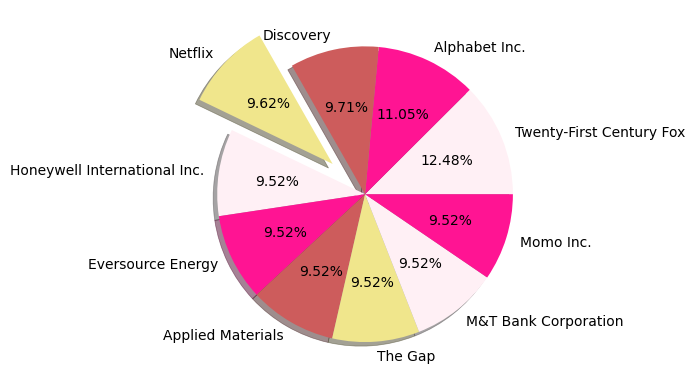

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
parcala=[0,0,0,0.3,0,0,0,0,0,0]
plt.pie(top10.values,
        labels=top10.index,
        autopct="%1.2f%%",
        colors=['lavenderblush','deeppink',"indianred","khaki"],
        explode=parcala,
        shadow=30)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28264 entries, 0 to 28263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             28264 non-null  int64 
 1   text           28264 non-null  object
 2   timestamp      28264 non-null  object
 3   source         28264 non-null  object
 4   symbols        28264 non-null  object
 5   company_names  28263 non-null  object
 6   url            21895 non-null  object
 7   verified       28264 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.5+ MB


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

/tmp/ipykernel_13/2401315100.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp']=pd.to_datetime(df['timestamp'])


In [ ]:
df.sample(3)

,id,text,timestamp,source,symbols,company_names,url,verified
19859,1019555102213001200,Back from the dead: Eli Lilly Pfizer celebrate...,2018-07-18 12:10:53+00:00,JohnCendpts,LLY,Eli Lilly and Company,https://twitter.com/i/web/status/1019555102213...,True
21204,1019584100133490700,RT @cfromhertz: $MOMO making a nice move after...,2018-07-18 14:06:07+00:00,Everlynpdram,MOMO,Momo Inc.,NaN,False
27613,1019717676355203100,The best stock picker you've probably never he...,2018-07-18 22:56:54+00:00,chipscully,C,Citigroup Inc.,https://cnb.cx/2Nqy6dx,False


In [ ]:
gr=df.groupby(pd.Grouper(key="timestamp",freq="d")).count()
gr

,id,text,source,symbols,company_names,url,verified
timestamp,,,,,,,
2018-02-23 00:00:00+00:00,1,1,1,1,1,1,1
2018-02-24 00:00:00+00:00,0,0,0,0,0,0,0
2018-02-25 00:00:00+00:00,0,0,0,0,0,0,0
2018-02-26 00:00:00+00:00,0,0,0,0,0,0,0
2018-02-27 00:00:00+00:00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-07-15 00:00:00+00:00,2084,2084,2084,2084,2084,1871,2084
2018-07-16 00:00:00+00:00,3085,3085,3085,3085,3085,2450,3085
2018-07-17 00:00:00+00:00,5076,5076,5076,5076,5076,3885,5076


In [ ]:
gr.sort_values(by="id")

,id,text,source,symbols,company_names,url,verified
timestamp,,,,,,,
2018-05-07 00:00:00+00:00,0,0,0,0,0,0,0
2018-05-31 00:00:00+00:00,0,0,0,0,0,0,0
2018-05-30 00:00:00+00:00,0,0,0,0,0,0,0
2018-05-29 00:00:00+00:00,0,0,0,0,0,0,0
2018-05-28 00:00:00+00:00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-07-12 00:00:00+00:00,1562,1562,1562,1562,1561,1331,1562
2018-07-15 00:00:00+00:00,2084,2084,2084,2084,2084,1871,2084
2018-07-16 00:00:00+00:00,3085,3085,3085,3085,3085,2450,3085


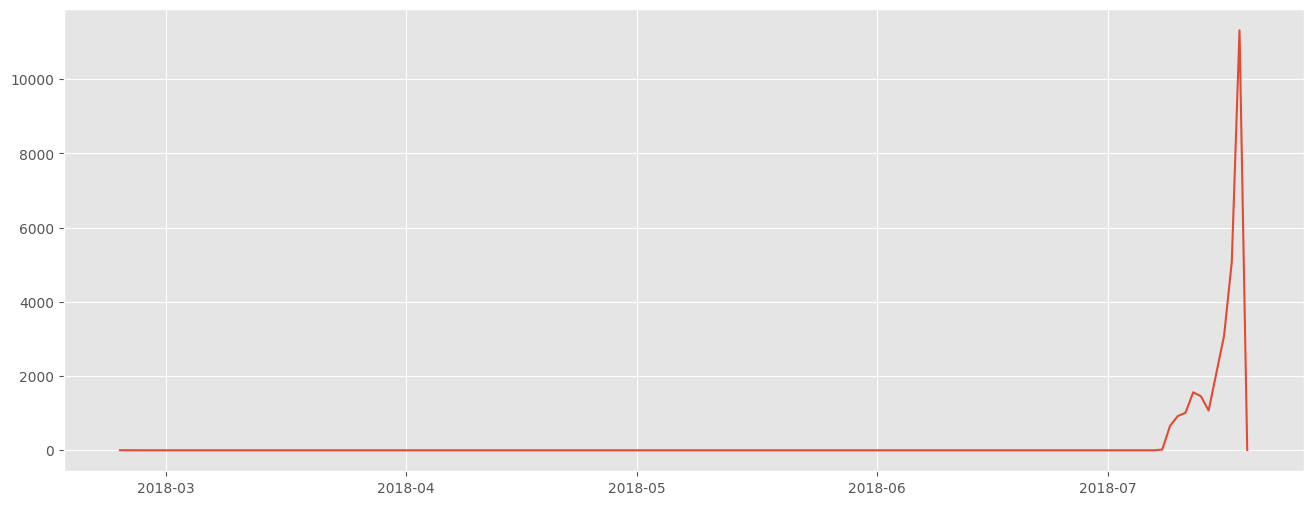

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.plot(gr.index,gr['id'])
plt.show()

In [ ]:
df.groupby(df['timestamp'].dt.dayofweek).count()

,id,text,timestamp,source,symbols,company_names,url,verified
timestamp,,,,,,,,
0,3742,3742,3742,3742,3742,3742,2968,3742
1,5996,5996,5996,5996,5996,5996,4660,5996
2,12324,12324,12324,12324,12324,12324,9060,12324
3,1570,1570,1570,1570,1570,1569,1338,1570
4,1457,1457,1457,1457,1457,1457,1091,1457
5,1071,1071,1071,1071,1071,1071,888,1071
6,2104,2104,2104,2104,2104,2104,1890,2104


In [ ]:
!pip install missingno

In [ ]:
import missingno as msn

<Axes: >

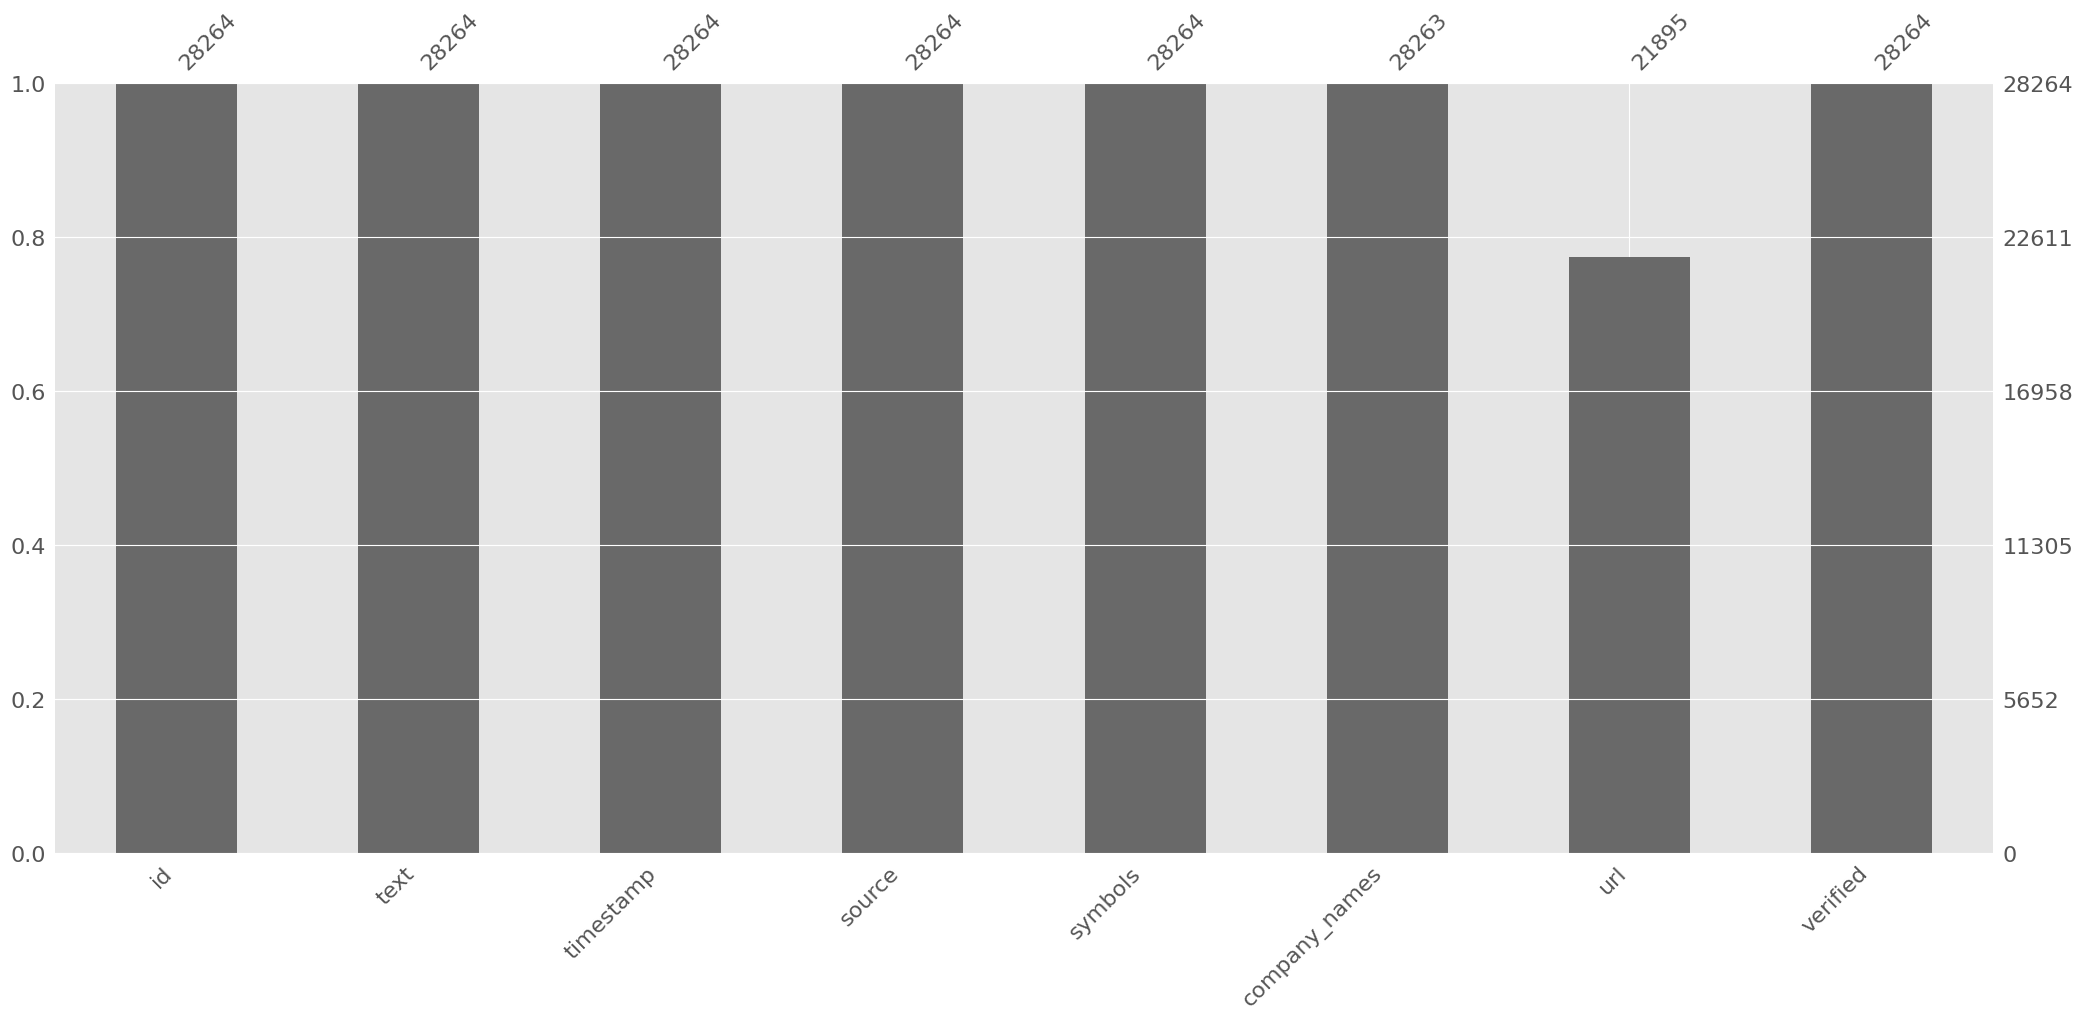

In [ ]:
msn.bar(df)

<Axes: >

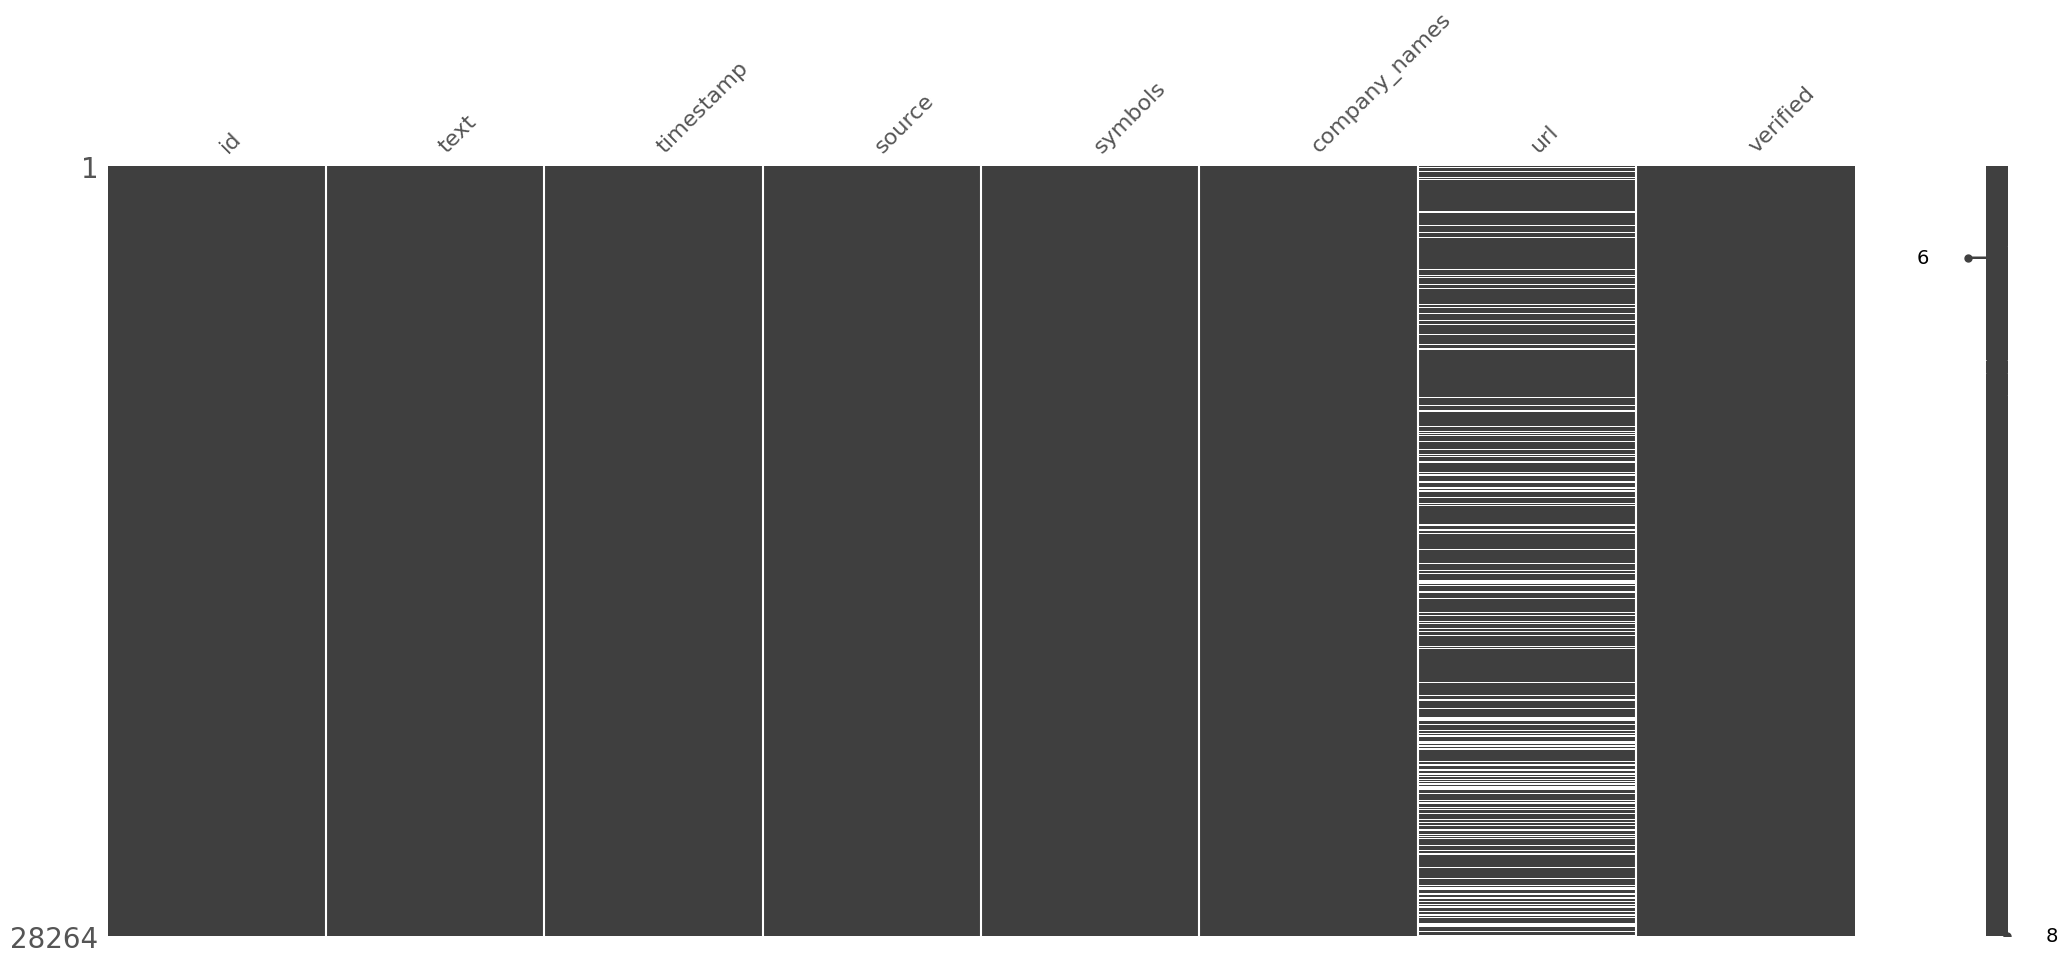

In [ ]:
msn.matrix(df)

<Axes: >

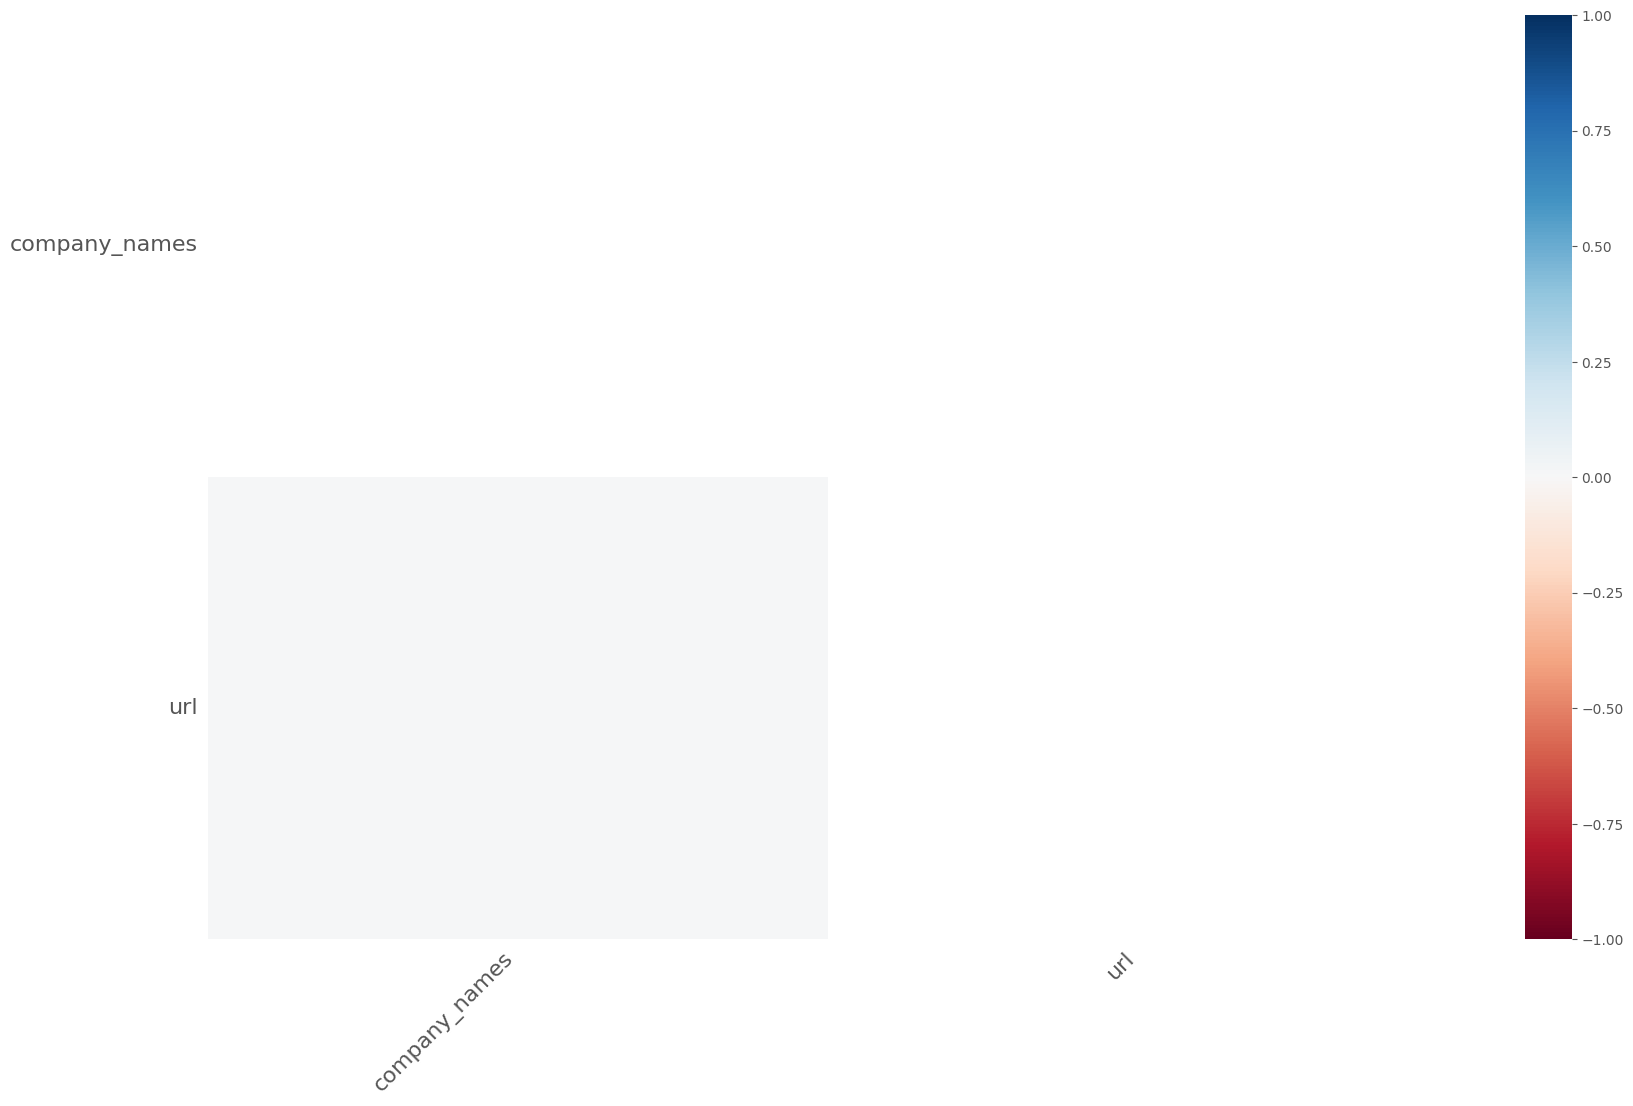

In [ ]:
msn.heatmap(df)